In [2]:
from matplotlib import pyplot as plt
import numpy as np
#import mogreps
import netCDF4
import pandas as pd

In [48]:
# read in netCDF
#from netCDF4 import Dataset
data_set = netCDF4.Dataset('ensemble_means_201401_lat250_lon100.nc')
data_setFeb = netCDF4.Dataset('ensemble_means_201402_lat250_lon100.nc')
data_settestJan = netCDF4.Dataset('test_data_201401_lat250_lon100.nc')
data_settestFeb = netCDF4.Dataset('test_data_201402_lat250_lon100.nc')

In [49]:
data_set.variables.keys()
temperature = np.zeros(60)

temperatureJan = data_set.variables['Temperature']
pressureJan = data_set.variables['Pressure']
humidityJan = data_set.variables['Humidity']
windspeedJan = data_set.variables['Wind Speed']

temperatureFeb = data_setFeb.variables['Temperature']
pressureFeb = data_setFeb.variables['Pressure']
humidityFeb = data_setFeb.variables['Humidity']
windspeedFeb = data_setFeb.variables['Wind Speed']

temptestJan = data_settestJan.variables['Temperature']
pressuretestJan = data_settestJan.variables['Pressure']
humiditytestJan = data_settestJan.variables['Humidity']
windspeedtestJan = data_settestJan.variables['Wind Speed']

temptestFeb = data_settestFeb.variables['Temperature']
pressuretestFeb = data_settestFeb.variables['Pressure']
humiditytestFeb = data_settestFeb.variables['Humidity']
windspeedtestFeb = data_settestFeb.variables['Wind Speed']


In [99]:
temperature_train = np.concatenate([temperatureJan,temperatureFeb])
pressure_train = np.concatenate([pressureJan,pressureFeb])
humidity_train = np.concatenate([humidityJan,humidityFeb])
wind_train = np.concatenate([windspeedJan,windspeedFeb])

temperature_test = np.concatenate([np.mean(temptestJan,axis=1),np.mean(temptestFeb,axis=1)])
pressure_test = np.concatenate([np.mean(pressuretestJan,axis=1),np.mean(pressuretestFeb,axis=1)])
humidity_test = np.concatenate([np.mean(humiditytestJan,axis=1),np.mean(humiditytestFeb,axis=1)])
wind_test = np.concatenate([np.mean(windspeedtestJan,axis=1),np.mean(windspeedtestFeb,axis=1)])

In [3]:
!pip install sklearn

    100% |████████████████████████████████| 12.4MB 93kB/s 
  Running setup.py bdist_wheel for sklearn ... done
  Stored in directory: /home/jemima/.cache/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [89]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import neural_network
from sklearn import svm

# Load the dataset.
#traindata=pd.read_table('traindata.txt',usecols=[1,2,3,4,5,6,7,8])
#testdata=pd.read_table('testdata.txt',usecols=[1,2,3,4,5,6,7,8])

In [96]:
number = 40;

np.mean(temptestJan,axis=1).shape

#humidity_train = np.array(humidity[:number])
#humidity_test = np.array(humidity[number:])
#pressure_train =  np.array(pressure[:number])
#pressure_test = np.array(pressure[number:])
#wind_train =  np.array(windspeed[:number])
#wind_test = np.array(windspeed[number:])

#temperature_train = temperature[:number]
#temperature_test = temperature[number:]

(31,)

In [57]:
# Split the data into training/testing sets.
#humidity_train = np.array(traindata['Xdes'])
#humidity_test = np.array(testdata['Xdes'])
#pressure_train =  np.array(traindata['Ydes'])
#pressure_test = np.array(testdata['Ydes'])
#wind_train =  np.array(traindata['Sdes'])
#wind_test = np.array(testdata['Sdes'])

###Jan data
#humidity_train = np.array(humidity[0:20])
#humidity_test = np.array(humidity[21:-1])
#pressure_train =  np.array(pressure[0:20])
#pressure_test = np.array(pressure[21:-1])
#wind_train =  np.array(windspeed[0:20])
#wind_test = np.array(windspeed[21:-1])

#temperature_train = temperature[0:20]
#temperature_test = temperature[21:-1]

#Feb
#humidity_trainFeb = np.array(humidityFeb[0:20])
#humidity_testFeb = np.array(humidityFeb[21:-1])
#pressure_trainFeb =  np.array(pressureFeb[0:20])
#pressure_testFeb = np.array(pressureFeb[21:-1])
#wind_trainFeb =  np.array(windspeedFeb[0:20])
#wind_testFeb = np.array(windspeedFeb[21:-1])

#temperature_trainFeb = temperatureFeb[0:20]
#temperature_testFeb = temperatureFeb[21:-1]

In [106]:
np.stack((humidity_test,pressure_test,wind_test)).shape

humidity_test.shape
temperature_train.shape


(59,)

In [108]:
# Split the targets into training/testing sets.
##temperature_train = np.array(traindata['Y'])
#temperature_test = np.array(testdata['Y'])

predictors_train=np.stack((humidity_train,pressure_train,wind_train),axis=1)
predictors_test=np.stack((humidity_test,pressure_test,wind_test),axis=1)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(predictors_train,temperature_train)

# Make predictions using the testing set
temperature_pred = regr.predict(predictors_test)

# The coefficients.
print('Coefficients: \n', regr.coef_)
# The mean squared error.
print("Mean squared error: %.2f"
      % mean_squared_error(temperature_test, temperature_pred))
# Explained variance score: 1 is perfect prediction.
print('Variance score: %.2f' % r2_score(temperature_test, temperature_pred))



Coefficients: 
 [0.04331933 0.00103093 0.22308189]
Mean squared error: 13.11
Variance score: 0.34


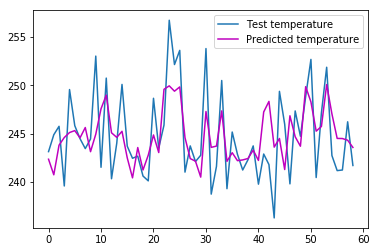

In [109]:
plt.plot(temperature_test,label='Test temperature')
plt.plot(temperature_pred,'m',label='Predicted temperature')
plt.legend()
plt.show()

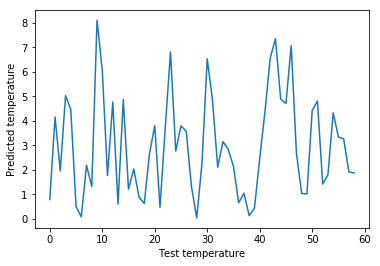

In [114]:
plt.plot(np.sqrt((temperature_test-temperature_pred)**2))
plt.xlabel('Test temperature')
plt.ylabel('Predicted temperature')
#plt.legend()
plt.show()

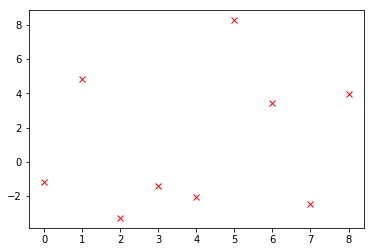

In [49]:
plt.plot(temperature_pred - temperature_test,'rx')
plt.show()

In [132]:
#MLPRegressor

# Create multilevel regression object
regrML = neural_network.MLPRegressor(solver='lbfgs')

# Train the model using the training sets
regrML.fit(predictors_train,temperature_train)

# Make predictions using the testing set
temperature_predML = regrML.predict(predictors_test)



In [133]:
# The coefficients.
#print('Coefficients: \n', regrML.coefs_)
# The mean squared error.
print("Mean squared error: %.2f"
      % mean_squared_error(temperature_test, temperature_predML))
# Explained variance score: 1 is perfect prediction.
print('Variance score: %.2f' % r2_score(temperature_test, temperature_predML))

#print(regrML.intercepts_)
print(regrML.n_iter_)
#intercepts_
print('Number of layers: %.2f' % regrML.n_layers_)

Mean squared error: 15.63
Variance score: 0.21
65
Number of layers: 3.00


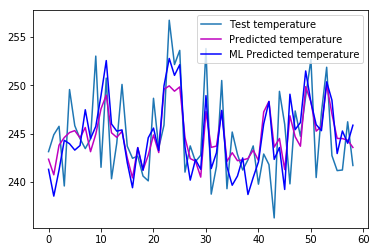

In [134]:
plt.plot(temperature_test,label='Test temperature')
plt.plot(temperature_pred,'m',label='Predicted temperature')
plt.plot(temperature_predML,'b',label='ML Predicted temperature')
plt.legend()
plt.show()

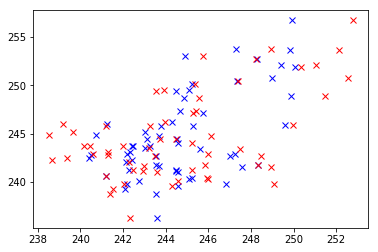

In [137]:
plt.plot(temperature_pred, temperature_test,'bx')
plt.plot(temperature_predML, temperature_test,'rx')
plt.show()

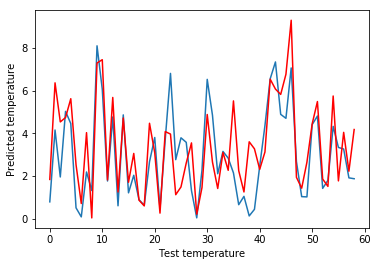

In [138]:
plt.plot(np.sqrt((temperature_test-temperature_pred)**2))
plt.plot(np.sqrt((temperature_test-temperature_predML)**2),'r')
plt.xlabel('Test temperature')
plt.ylabel('Predicted temperature')
#plt.legend()
plt.show()

In [92]:
X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
y = np.array([1, 1, 2, 2])
from sklearn.svm import SVC
clf = SVC()
clf.fit(X, y) 
#SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
#    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
#    max_iter=-1, probability=False, random_state=None, shrinking=True,
#    tol=0.001, verbose=False)
print(clf.predict([[-0.8, -1]]))

[1]


In [95]:


#SVC

# Create multilevel regression object
#regrSVC = SVC(kernel='linear', C=1)

# Train the model using the training sets
#regrSVC.fit(np.stack((humidity_train,pressure_train,wind_train),axis=1),temperature_train)

# Make predictions using the testing set
#temperature_predSVC = regrSVC.predict(np.stack((humidity_test,pressure_test,wind_test),axis=1))
